![data-x](http://oi64.tinypic.com/o858n4.jpg)

---
# Pandas Introduction 
### with Stock Data and Correlation Examples


**Author list:** Ikhlaq Sidhu & Alexander Fred Ojala

**References / Sources:** 
Includes examples from Wes McKinney and the 10min intro to Pandas


**License Agreement:** Feel free to do whatever you want with this code

___

## What Does Pandas Do?
<img src="https://github.com/ikhlaqsidhu/data-x/raw/master/imgsource/pandas-p1.jpg">

## What is a Pandas Table Object?
<img src="https://github.com/ikhlaqsidhu/data-x/raw/master/imgsource/pandas-p2.jpg">


## This table is a dictionary of sequences (like np arrays)
<img src="https://github.com/ikhlaqsidhu/data-x/raw/master/imgsource/pandas-p3.jpg">


# Import packages

In [1]:
# import packages

import pandas as pd

# Extra packages
import numpy as np
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting and styling

# jupyter notebook magic to display plots in output
%matplotlib inline

plt.rcParams['figure.figsize'] = (10,6) # make the plots bigger

# Part 1
### Simple creation and manipulation of Pandas objects
**Key Points:** Pandas has two / three main data types:
* Series (similar to numpy arrays, but with index)
* DataFrames (table or spreadsheet with Series in the columns)
* Panels (3D version of DataFrame, not as common)

### It is easy to create a DataFrame

### We use `pd.DataFrame(**inputs**)` and can insert almost any data type as an argument

**Function:** `pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)`

Input data can be a numpy ndarray (structured or homogeneous), dict, or DataFrame. 
Dict can contain Series, arrays, constants, or list-like objects as the values.

In [2]:
# Try it with an array
np.random.seed(0) # set seed for reproducibility

a1 = np.array(np.random.randn(3))
a2 = np.array(np.random.randn(3))
a3 = np.array(np.random.randn(3))

print (a1)
print (a2)
print (a3)

[ 1.76405235  0.40015721  0.97873798]
[ 2.2408932   1.86755799 -0.97727788]
[ 0.95008842 -0.15135721 -0.10321885]


In [3]:
print(type(a1))

<class 'numpy.ndarray'>


In [4]:
# Create our first DataFrame w/ an np.array - it becomes a column
df0 = pd.DataFrame(a1)
print ("This is a", type(df0), ':')
df0

This is a <class 'pandas.core.frame.DataFrame'> :


,0
0,1.764052
1,0.400157
2,0.978738


In [5]:
print(df0) # difference when you print and output of the last row

          0
0  1.764052
1  0.400157
2  0.978738


In [6]:
# DataFrame from list of np.arrays

df0 = pd.DataFrame([a1, a2, a3])
df0

# notice that there is no column label, only integer values,
# and the index is set automatically

,0,1,2
0,1.764052,0.400157,0.978738
1,2.240893,1.867558,-0.977278
2,0.950088,-0.151357,-0.103219


In [7]:
# DataFrame from 2D np.array

np.random.seed(0)

ax = np.array(np.random.randn(9)).reshape(3,3)
ax

array([[ 1.76405235,  0.40015721,  0.97873798],
       [ 2.2408932 ,  1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721, -0.10321885]])

In [8]:
df0 = pd.DataFrame(ax,columns=['rand_normal_1','Random Again','Third'],
                   index=[100,200,99]) # we can also assign columns and indices, sizes have to match
df0

,rand_normal_1,Random Again,Third
100,1.764052,0.400157,0.978738
200,2.240893,1.867558,-0.977278
99,0.950088,-0.151357,-0.103219


In [9]:
# DataFrame from a Dictionary

dict1 = {'A':a1, 'B':a2}
df1 = pd.DataFrame(dict1) 
df1
# note that we now have columns without assignment

,A,B
0,1.764052,2.240893
1,0.400157,1.867558
2,0.978738,-0.977278


In [10]:
# We can easily add another column (just as you add values to a dictionary)
df1['C']=a3
df1

,A,B,C
0,1.764052,2.240893,0.950088
1,0.400157,1.867558,-0.151357
2,0.978738,-0.977278,-0.103219


In [11]:
# We can add a list with strings and ints as a column 
df1['L'] = ["List", 3, "words"]
print ("The column L is a ",type (df1['L']))
df1

The column L is a  <class 'pandas.core.series.Series'>


,A,B,C,L
0,1.764052,2.240893,0.950088,List
1,0.400157,1.867558,-0.151357,3
2,0.978738,-0.977278,-0.103219,words


In [12]:
print(df1['L'][0])
print(type(df1['L'][0]))
print(df1['L'][1])
print(type(df1['L'][1])) # datatype not upcasted / changed as in numpy

List
<class 'str'>
3
<class 'int'>


# Pandas Series object
### Like an np.array, but we can combine data types and it has its own index
Note: Every column in a DataFrame is a Series

In [13]:
print(df1['L'])
print()
print(type(df1['L']))

0     List
1        3
2    words
Name: L, dtype: object

<class 'pandas.core.series.Series'>


In [14]:
# Create a Series from a Python list
s = pd.Series([1,np.nan,3]) # automatic index, 0,1,2...
s2 = pd.Series([2, 3, 4], index = ['a','b','c']) #specific index
print (s)
print()
print (s2)

0    1.0
1    NaN
2    3.0
dtype: float64

a    2
b    3
c    4
dtype: int64


In [15]:
# We can add the Series s to the DataFrame above as column S
df1['S'] = s
df1

,A,B,C,L,S
0,1.764052,2.240893,0.950088,List,1.0
1,0.400157,1.867558,-0.151357,3,NaN
2,0.978738,-0.977278,-0.103219,words,3.0


In [17]:
# What happens if we use Series s2 
# which has a different index?
df1['S2']=s2
df1

,A,B,C,L,S,S2
0,1.764052,2.240893,0.950088,List,1.0,NaN
1,0.400157,1.867558,-0.151357,3,NaN,NaN
2,0.978738,-0.977278,-0.103219,words,3.0,NaN


In [21]:
# possible fix
# s2_new=s2.reset_index().drop('index',axis=1)
# df1['S2'] = s2_new
# df1
# or
# s2.index = df1.index
# df1['S2'] = s2

# or
df1['S2'] = list(s2) # because lists don't have any indices
df1

,A,B,C,L,S,S2
0,1.764052,2.240893,0.950088,List,1.0,2
1,0.400157,1.867558,-0.151357,3,NaN,3
2,0.978738,-0.977278,-0.103219,words,3.0,4


In [24]:
# But if we create a new dataframe with s2, 
# we can add the data but with the new index
df2 = pd.DataFrame(s2,columns=['S2'])
df2

,S2
a,2
b,3
c,4


In [25]:
df2['A']= a1
df2['B']=a2
df2['C']=a3
df2

,S2,A,B,C
a,2,1.764052,2.240893,0.950088
b,3,0.400157,1.867558,-0.151357
c,4,0.978738,-0.977278,-0.103219


In [26]:
# You can extract rows by position or label
print (df2[1:3]) # second and third row
print()
print (df2['a':'b']) # from a to b inclusive

   S2         A         B         C
b   3  0.400157  1.867558 -0.151357
c   4  0.978738 -0.977278 -0.103219

   S2         A         B         C
a   2  1.764052  2.240893  0.950088
b   3  0.400157  1.867558 -0.151357


In [27]:
# Back to df1
df1

,A,B,C,L,S,S2
0,1.764052,2.240893,0.950088,List,1.0,2
1,0.400157,1.867558,-0.151357,3,NaN,3
2,0.978738,-0.977278,-0.103219,words,3.0,4


In [28]:
# We can also rename columns
df1 = df1.rename(columns = {'L':'Renamed'})
df1

,A,B,C,Renamed,S,S2
0,1.764052,2.240893,0.950088,List,1.0,2
1,0.400157,1.867558,-0.151357,3,NaN,3
2,0.978738,-0.977278,-0.103219,words,3.0,4


In [29]:
# We can delete columns
del df1['S2']
df1

,A,B,C,Renamed,S
0,1.764052,2.240893,0.950088,List,1.0
1,0.400157,1.867558,-0.151357,3,NaN
2,0.978738,-0.977278,-0.103219,words,3.0


In [30]:
# or drop columns
df1.drop('A',axis=1) # does not change df1 if we don't set inplace=True

,B,C,Renamed,S
0,2.240893,0.950088,List,1.0
1,1.867558,-0.151357,3,NaN
2,-0.977278,-0.103219,words,3.0


In [31]:
df1

,A,B,C,Renamed,S
0,1.764052,2.240893,0.950088,List,1.0
1,0.400157,1.867558,-0.151357,3,NaN
2,0.978738,-0.977278,-0.103219,words,3.0


In [42]:
# or drop rows
df1.drop(0)

,A,B,C,Renamed,S
1,0.400157,1.867558,-0.151357,3,NaN
2,0.978738,-0.977278,-0.103219,words,3.0


In [41]:
df1.drop?

In [43]:
# Example: view only one column
df1['A']

0    1.764052
1    0.400157
2    0.978738
Name: A, dtype: float64

In [47]:
# Or view several column
df1[['A','C']]

,A,C
0,1.764052,0.950088
1,0.400157,-0.151357
2,0.978738,-0.103219


# Other ways of slicing
In the 10 min Pandas Guide, you will see many ways to view, slice a dataframe

* view/slice by rows, eg `df[1:3]`, etc.

* view by index location, see `df.iloc` (iloc)

* view by ranges of labels, ie index label 2 to 5, or dates feb 3 to feb 25, see `df.loc` (loc)
 
* view a single row by the index `df.xs` (xs) or `df.ix` (ix)

* filtering rows that have certain conditions
* add column
* add row

* How to change the index

and more...

In [59]:
print (df1[0:2])  # ok
# df1[1]  # not ok

          A         B         C Renamed    S
0  1.764052  2.240893  0.950088    List  1.0
1  0.400157  1.867558 -0.151357       3  NaN


In [60]:
df1.loc[0,['A','B','S']] # first row, three columns

A    1.76405
B    2.24089
S          1
Name: 0, dtype: object

In [61]:
print (df1[0:2][0:1]) # slice of the DataFrame returned

          A         B         C Renamed    S
0  1.764052  2.240893  0.950088    List  1.0


In [62]:
df1.xs(0)

A           1.76405
B           2.24089
C          0.950088
Renamed        List
S                 1
Name: 0, dtype: object

# Part 2
## Finance example: Large Data Frames

### Now, lets get some data in CSV format.

See https://www.quantshare.com/sa-43-10-ways-to-download-historical-stock-quotes-data-for-free


In [72]:
# We can download data from the web by using pd.read_csv
# A CSV file is a comma seperated file
# We can use this 'pd.read_csv' method with urls that host csv files

dfg = pd.read_csv('https://www.google.com/finance/historical?output=csv&q=googl') # Google stock data
dfa = pd.read_csv('https://www.google.com/finance/historical?output=csv&q=aapl') # Apple stock data

In [73]:
dfg.head() # show first five values

,Date,Open,High,Low,Close,Volume
0,27-Oct-17,1030.99,1063.62,1026.85,1033.67,5184143
1,26-Oct-17,998.47,1006.51,990.47,991.42,2369838
2,25-Oct-17,986.27,994.43,977.72,991.46,1528710
3,24-Oct-17,986.50,989.26,977.08,988.49,1445129
4,23-Oct-17,1005.18,1005.79,983.10,985.54,1639294


In [74]:
dfg.tail(3) # last three

,Date,Open,High,Low,Close,Volume
248,2-Nov-16,806.76,806.76,785.00,788.42,2350736
249,1-Nov-16,810.87,813.96,798.26,805.48,2355890
250,31-Oct-16,822.43,822.63,808.00,809.90,2242679


In [75]:
dfg.columns # returns columns, can be used to loop over

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [76]:
dfg.index # return

RangeIndex(start=0, stop=251, step=1)

In [77]:
dfg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
Date      251 non-null object
Open      251 non-null float64
High      251 non-null float64
Low       251 non-null float64
Close     251 non-null float64
Volume    251 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 11.8+ KB


# Convert the index to pandas datetime object

In [78]:
type(dfg['Date'][0])

str

In [79]:
dfg.index = pd.to_datetime(dfg['Date']) # set index

In [80]:
dfg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2017-10-27 to 2016-10-31
Data columns (total 6 columns):
Date      251 non-null object
Open      251 non-null float64
High      251 non-null float64
Low       251 non-null float64
Close     251 non-null float64
Volume    251 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 13.7+ KB


In [81]:
dfg.drop(['Date'],axis=1,inplace=True)

In [82]:
dfg.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-10-27,1030.99,1063.62,1026.85,1033.67,5184143
2017-10-26,998.47,1006.51,990.47,991.42,2369838
2017-10-25,986.27,994.43,977.72,991.46,1528710
2017-10-24,986.50,989.26,977.08,988.49,1445129
2017-10-23,1005.18,1005.79,983.10,985.54,1639294


In [83]:
print(type(dfg.index[0]))
dfg.index[0]

<class 'pandas._libs.tslib.Timestamp'>


Timestamp('2017-10-27 00:00:00')

In [84]:
dfg['2017-04-07':'2017-04-01']

,Open,High,Low,Close,Volume
Date,,,,,
2017-04-07,845.00,845.88,837.30,842.10,1111610
2017-04-06,849.50,853.59,844.00,845.10,1533564
2017-04-05,854.71,860.59,847.52,848.91,1855153
2017-04-04,848.00,853.00,847.50,852.57,1348494
2017-04-03,848.75,859.00,847.53,856.75,1969402


# Attributes & general statitics of a Pandas DataFrame

In [85]:
dfg.shape # 249 business days last year

(251, 5)

In [86]:
dfg.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [87]:
dfg.size

1255

In [88]:
# Some general statistics

dfg.describe()

,Open,High,Low,Close,Volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,895.825857,901.436175,889.438606,895.834343,1.706495e+06
std,72.996676,73.570304,72.773291,73.323386,7.622144e+05
min,761.900000,770.500000,743.590000,753.220000,6.135490e+05
25%,830.765000,834.450000,824.855000,829.970000,1.275832e+06
50%,924.150000,933.360000,918.630000,923.590000,1.505486e+06
75%,957.235000,961.995000,948.655000,958.475000,1.875032e+06
max,1030.990000,1063.620000,1026.850000,1033.670000,5.933602e+06


In [91]:
# Boolean indexing
dfg['Open'][dfg['Open']>980] # check what dates the opening

Date
2017-10-27    1030.99
2017-10-26     998.47
2017-10-25     986.27
2017-10-24     986.50
2017-10-23    1005.18
2017-10-20    1007.05
2017-10-19    1004.75
2017-10-18    1011.05
2017-10-17    1007.44
2017-10-16    1009.63
2017-10-13    1009.11
2017-10-12    1003.84
2017-10-11     989.04
2017-10-10     995.30
2017-10-09     995.00
2017-07-24     994.10
2017-07-21     989.00
2017-07-20     997.00
2017-07-19     990.01
2017-06-26     990.00
2017-06-09    1005.49
2017-06-08    1004.23
2017-06-07     998.82
2017-06-06    1003.31
2017-06-05     997.89
2017-06-02     988.59
2017-06-01     990.96
2017-05-31     996.21
2017-05-30     992.50
2017-05-26     992.00
Name: Open, dtype: float64

In [92]:
# Check where Open, High, Low and Close where greater than 980
dfg[dfg>980].drop('Volume',axis=1).head(3)

,Open,High,Low,Close
Date,,,,
2017-10-27,1030.99,1063.62,1026.85,1033.67
2017-10-26,998.47,1006.51,990.47,991.42
2017-10-25,986.27,994.43,NaN,991.46


In [93]:
# drop na
dfg[dfg>980].drop('Volume',axis=1).dropna().head(3)

,Open,High,Low,Close
Date,,,,
2017-10-27,1030.99,1063.62,1026.85,1033.67
2017-10-26,998.47,1006.51,990.47,991.42
2017-10-23,1005.18,1005.79,983.10,985.54


In [94]:
# If you want the values in an np array
npg = dfg.values
print(type(npg))
print()
npg

<class 'numpy.ndarray'>



array([[  1.03099000e+03,   1.06362000e+03,   1.02685000e+03,
          1.03367000e+03,   5.18414300e+06],
       [  9.98470000e+02,   1.00651000e+03,   9.90470000e+02,
          9.91420000e+02,   2.36983800e+06],
       [  9.86270000e+02,   9.94430000e+02,   9.77720000e+02,
          9.91460000e+02,   1.52871000e+06],
       ..., 
       [  8.06760000e+02,   8.06760000e+02,   7.85000000e+02,
          7.88420000e+02,   2.35073600e+06],
       [  8.10870000e+02,   8.13960000e+02,   7.98260000e+02,
          8.05480000e+02,   2.35589000e+06],
       [  8.22430000e+02,   8.22630000e+02,   8.08000000e+02,
          8.09900000e+02,   2.24267900e+06]])

### Selecting or Viewing Data within a DataFrame
Note: While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix. (from 10 min guide to Pandas)


In [95]:
# Lets print the five first Close prices for Google
# This is a new Series (like a new table)
dfg['Close'][0:5]

Date
2017-10-27    1033.67
2017-10-26     991.42
2017-10-25     991.46
2017-10-24     988.49
2017-10-23     985.54
Name: Close, dtype: float64

In [96]:
# Lets print the 2 column, and top 3 values
dfg[['Close','High']][0:3]

,Close,High
Date,,
2017-10-27,1033.67,1063.62
2017-10-26,991.42,1006.51
2017-10-25,991.46,994.43


In [97]:
# A slice: by rows (row numbers)
dfg[1:5] # 2nd to 5th element

,Open,High,Low,Close,Volume
Date,,,,,
2017-10-26,998.47,1006.51,990.47,991.42,2369838
2017-10-25,986.27,994.43,977.72,991.46,1528710
2017-10-24,986.50,989.26,977.08,988.49,1445129
2017-10-23,1005.18,1005.79,983.10,985.54,1639294


## .loc()

In [98]:
# Getting a cross section with .loc - BY VALUES of the index and columns
# df.loc[a:b, x:y], by rows and column location

# Note: You have to know indices and columns

dfg.loc['2017-08-31':'2017-08-21','Open':'Close']

,Open,High,Low,Close
Date,,,,
2017-08-31,946.30,957.20,946.25,955.24
2017-08-30,935.67,945.86,934.05,943.63
2017-08-29,919.95,938.19,919.31,935.75
2017-08-28,931.88,934.85,926.11,928.13
2017-08-25,939.21,940.73,930.10,930.50
2017-08-24,943.71,946.31,930.74,936.89
2017-08-23,937.00,945.42,935.24,942.58
2017-08-22,926.96,941.96,926.17,940.40
2017-08-21,925.77,928.25,918.60,920.87


## .iloc()

In [99]:
dfg.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [100]:
# .iloc slicing at specific location - BY POSITION in the table
# Recall:
# dfg[a:b] by rows
# dfg[[col]] or df[[col1, col2]] by columns
# df.loc[a:b, x:y], by index and column values + location
# df.iloc[3:5,0:2], numeric position in table

dfg.iloc[1:4,3:5] # 2nd to 4th row, 4th to 5th column

,Close,Volume
Date,,
2017-10-26,991.42,2369838
2017-10-25,991.46,1528710
2017-10-24,988.49,1445129


In [101]:
# Data only from row with index value '3'
print (dfg.iloc[3])

Open          986.50
High          989.26
Low           977.08
Close         988.49
Volume    1445129.00
Name: 2017-10-24 00:00:00, dtype: float64


In [102]:
# iloc will accept 'lists' of position numbers
dfg.iloc[[1,2,4],[0,2]]

,Open,Low
Date,,
2017-10-26,998.47,990.47
2017-10-25,986.27,977.72
2017-10-23,1005.18,983.10


In [103]:
# iloc will accept a range with ':', just like numpy
dfg.iloc[1:3,:]

,Open,High,Low,Close,Volume
Date,,,,,
2017-10-26,998.47,1006.51,990.47,991.42,2369838
2017-10-25,986.27,994.43,977.72,991.46,1528710


In [104]:
# Can also return specific value
print (dfg.iloc[2,1])
# same as above but faster for one single scaler value
print (dfg.iat[2,1])

994.43
994.43


In [105]:
?dfg.iat() #fast integer location scalar accessor

### More Basic Statistics

In [106]:
# A quick way to get statistics
dfg.describe()
# dfg.describe()['A'][1]
# dfg.describe()[2:3]

,Open,High,Low,Close,Volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,895.825857,901.436175,889.438606,895.834343,1.706495e+06
std,72.996676,73.570304,72.773291,73.323386,7.622144e+05
min,761.900000,770.500000,743.590000,753.220000,6.135490e+05
25%,830.765000,834.450000,824.855000,829.970000,1.275832e+06
50%,924.150000,933.360000,918.630000,923.590000,1.505486e+06
75%,957.235000,961.995000,948.655000,958.475000,1.875032e+06
max,1030.990000,1063.620000,1026.850000,1033.670000,5.933602e+06


In [107]:
dfg.describe().loc[['mean','std'],['High','Low']]

,High,Low
mean,901.436175,889.438606
std,73.570304,72.773291


In [108]:
dfg.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-10-27,1030.99,1063.62,1026.85,1033.67,5184143
2017-10-26,998.47,1006.51,990.47,991.42,2369838
2017-10-25,986.27,994.43,977.72,991.46,1528710
2017-10-24,986.50,989.26,977.08,988.49,1445129
2017-10-23,1005.18,1005.79,983.10,985.54,1639294


In [109]:
# We can change the index sorting
dfg.sort_index(axis=0, ascending=True).head() # starts a year ago

,Open,High,Low,Close,Volume
Date,,,,,
2016-10-31,822.43,822.63,808.00,809.90,2242679
2016-11-01,810.87,813.96,798.26,805.48,2355890
2016-11-02,806.76,806.76,785.00,788.42,2350736
2016-11-03,784.50,790.00,778.63,782.19,2175216
2016-11-04,771.30,788.48,771.00,781.10,1970603


In [110]:
# sort by value
dfg[0:5].sort_values(by='Open')

,Open,High,Low,Close,Volume
Date,,,,,
2017-10-25,986.27,994.43,977.72,991.46,1528710
2017-10-24,986.50,989.26,977.08,988.49,1445129
2017-10-26,998.47,1006.51,990.47,991.42,2369838
2017-10-23,1005.18,1005.79,983.10,985.54,1639294
2017-10-27,1030.99,1063.62,1026.85,1033.67,5184143


In [111]:
dfg.describe()[2:3]

,Open,High,Low,Close,Volume
std,72.996676,73.570304,72.773291,73.323386,762214.35854


In [112]:
# Transpose in Pandas
dfg.describe()[2:3].T

,std
Open,72.996676
High,73.570304
Low,72.773291
Close,73.323386
Volume,762214.358540


### Masks and Boolean Indexing

In [113]:
dfg[0:10]

,Open,High,Low,Close,Volume
Date,,,,,
2017-10-27,1030.99,1063.62,1026.85,1033.67,5184143
2017-10-26,998.47,1006.51,990.47,991.42,2369838
2017-10-25,986.27,994.43,977.72,991.46,1528710
2017-10-24,986.50,989.26,977.08,988.49,1445129
2017-10-23,1005.18,1005.79,983.10,985.54,1639294
2017-10-20,1007.05,1008.65,1002.27,1005.07,1606031
2017-10-19,1004.75,1007.32,997.30,1001.84,1714243
2017-10-18,1011.05,1016.31,1005.32,1012.74,1279780
2017-10-17,1007.44,1014.56,1006.05,1011.00,1012998


In [114]:
# mask 1
mg1 = dfg['Open'][0:10]>941
print (mg1)
# dfg.Open[0:10]>941    # same thing

Date
2017-10-27    True
2017-10-26    True
2017-10-25    True
2017-10-24    True
2017-10-23    True
2017-10-20    True
2017-10-19    True
2017-10-18    True
2017-10-17    True
2017-10-16    True
Name: Open, dtype: bool


In [121]:
dfg['Open'][0:10][dfg['Open']>1000]
# shows only rows with opening price greater than 1000

Date
2017-10-27    1030.99
2017-10-23    1005.18
2017-10-20    1007.05
2017-10-19    1004.75
2017-10-18    1011.05
2017-10-17    1007.44
2017-10-16    1009.63
Name: Open, dtype: float64

In [127]:
# mask 2
mg2 = dfg[0:10]>1000
mg2
# replaces every value in the entire table with NaN if the value of below 1000

,Open,High,Low,Close,Volume
Date,,,,,
2017-10-27,True,True,True,True,True
2017-10-26,False,True,False,False,True
2017-10-25,False,False,False,False,True
2017-10-24,False,False,False,False,True
2017-10-23,True,True,False,False,True
2017-10-20,True,True,True,True,True
2017-10-19,True,True,False,True,True
2017-10-18,True,True,True,True,True
2017-10-17,True,True,True,True,True


In [128]:
dfg[dfg>1000].head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2017-10-27,1030.99,1063.62,1026.85,1033.67,5184143
2017-10-26,NaN,1006.51,NaN,NaN,2369838
2017-10-25,NaN,NaN,NaN,NaN,1528710
2017-10-24,NaN,NaN,NaN,NaN,1445129
2017-10-23,1005.18,1005.79,NaN,NaN,1639294
2017-10-20,1007.05,1008.65,1002.27,1005.07,1606031
2017-10-19,1004.75,1007.32,NaN,1001.84,1714243
2017-10-18,1011.05,1016.31,1005.32,1012.74,1279780
2017-10-17,1007.44,1014.56,1006.05,1011.00,1012998


In [129]:
# we can also drop all NaN values
dfg[dfg>1000].head(10).dropna()

,Open,High,Low,Close,Volume
Date,,,,,
2017-10-27,1030.99,1063.62,1026.85,1033.67,5184143
2017-10-20,1007.05,1008.65,1002.27,1005.07,1606031
2017-10-18,1011.05,1016.31,1005.32,1012.74,1279780
2017-10-17,1007.44,1014.56,1006.05,1011.00,1012998
2017-10-16,1009.63,1012.00,1001.52,1009.35,1071023


In [132]:
# another way to filter is with isin()
# syntax only
# df2[df2['E'].isin(['two','four'])]

In [133]:
# like Numpy, sometimes you need an actual copy, not a view or slice of the same data
dfg_same = dfg
dfg_same is dfg

True

In [134]:
dfg2 = dfg.copy()
dfg2 is dfg

False

### Setting Values


In [135]:
# Recall
dfg.head(4)

,Open,High,Low,Close,Volume
Date,,,,,
2017-10-27,1030.99,1063.62,1026.85,1033.67,5184143
2017-10-26,998.47,1006.51,990.47,991.42,2369838
2017-10-25,986.27,994.43,977.72,991.46,1528710
2017-10-24,986.50,989.26,977.08,988.49,1445129


In [136]:
# All the ways to view (by location, by index, iat, etc) 
# can also be used to set values
# good for data normalization

dfg['Volume'] = dfg['Volume']/1000.0
dfg.head(4)

,Open,High,Low,Close,Volume
Date,,,,,
2017-10-27,1030.99,1063.62,1026.85,1033.67,5184.143
2017-10-26,998.47,1006.51,990.47,991.42,2369.838
2017-10-25,986.27,994.43,977.72,991.46,1528.710
2017-10-24,986.50,989.26,977.08,988.49,1445.129


In [137]:
dfg['Volume'] = 9999
print(dfg.head(10))

               Open     High      Low    Close  Volume
Date                                                  
2017-10-27  1030.99  1063.62  1026.85  1033.67    9999
2017-10-26   998.47  1006.51   990.47   991.42    9999
2017-10-25   986.27   994.43   977.72   991.46    9999
2017-10-24   986.50   989.26   977.08   988.49    9999
2017-10-23  1005.18  1005.79   983.10   985.54    9999
2017-10-20  1007.05  1008.65  1002.27  1005.07    9999
2017-10-19  1004.75  1007.32   997.30  1001.84    9999
2017-10-18  1011.05  1016.31  1005.32  1012.74    9999
2017-10-17  1007.44  1014.56  1006.05  1011.00    9999
2017-10-16  1009.63  1012.00  1001.52  1009.35    9999


In [138]:
# Change specific entry
dfg.iat[0,1] = 0
dfg.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2017-10-27,1030.99,0.00,1026.85,1033.67,9999
2017-10-26,998.47,1006.51,990.47,991.42,9999
2017-10-25,986.27,994.43,977.72,991.46,9999


In [140]:
# Comments on dropping and filling NaN values
# A view where we drop any rows with value NnN
# dfg.dropna(how='any')  # this would be used to drop rows with Nan
# df1.fillna(value=5)    # this would be used to fill NaN values with 5

### More Statistics and Operations

In [141]:
# mean by column, also try var() for variance
dfg.mean()   

Open       895.825857
High       897.198645
Low        889.438606
Close      895.834343
Volume    9999.000000
dtype: float64

In [142]:
dfg[0:5].mean(1) # row means of first five rows
# dfg.mean(axis = 1)

Date
2017-10-27    2618.102
2017-10-26    2797.174
2017-10-25    2789.776
2017-10-24    2788.066
2017-10-23    2795.722
dtype: float64

In [143]:
# Use the apply method to perform calculations on every element
dfg2[0:10].apply(np.cumsum)

,Open,High,Low,Close,Volume
Date,,,,,
2017-10-27,1030.99,1063.62,1026.85,1033.67,5184143
2017-10-26,2029.46,2070.13,2017.32,2025.09,7553981
2017-10-25,3015.73,3064.56,2995.04,3016.55,9082691
2017-10-24,4002.23,4053.82,3972.12,4005.04,10527820
2017-10-23,5007.41,5059.61,4955.22,4990.58,12167114
2017-10-20,6014.46,6068.26,5957.49,5995.65,13773145
2017-10-19,7019.21,7075.58,6954.79,6997.49,15487388
2017-10-18,8030.26,8091.89,7960.11,8010.23,16767168
2017-10-17,9037.70,9106.45,8966.16,9021.23,17780166


# PlotCorrelation
### Load several stocks

In [144]:
# Reload
dfg = pd.read_csv('https://www.google.com/finance/historical?output=csv&q=goog')
dfa = pd.read_csv('https://www.google.com/finance/historical?output=csv&q=aapl')
dfm = pd.read_csv('https://www.google.com/finance/historical?output=csv&q=msft')
dfn = pd.read_csv('https://www.google.com/finance/historical?output=csv&q=nke')
dfb = pd.read_csv('https://www.google.com/finance/historical?output=csv&q=ba')

In [145]:
print (dfb.head())

        Date    Open    High     Low   Close   Volume
0  27-Oct-17  258.26  259.50  255.80  256.46  2899168
1  26-Oct-17  259.72  261.44  257.31  259.27  3419137
2  25-Oct-17  264.78  266.00  254.50  258.42  7895318
3  24-Oct-17  263.24  267.21  263.24  266.00  4401597
4  23-Oct-17  265.13  265.98  262.14  262.32  3302395


In [146]:
# Rename columns
dfg = dfg.rename(columns = {'Close':'GOOG'})
#print (dfg.head())

dfa = dfa.rename(columns = {'Close':'AAPL'})
#print (dfa.head())

dfm = dfm.rename(columns = {'Close':'MSFT'})
#print (dfm.head())

dfn = dfn.rename(columns = {'Close':'NKE'})
#print (dfn.head())

dfb = dfb.rename(columns = {'Close':'BA'})

In [147]:
dfb.head(2)

,Date,Open,High,Low,BA,Volume
0,27-Oct-17,258.26,259.50,255.80,256.46,2899168
1,26-Oct-17,259.72,261.44,257.31,259.27,3419137


In [148]:
# Lets merge some tables
# They will all merge on the common column Date

df = dfg[['Date','GOOG']].merge(dfa[['Date','AAPL']])
df = df.merge(dfm[['Date','MSFT']])
#df = df.merge(dfd[['Date','DIS']])
df = df.merge(dfn[['Date','NKE']])
df = df.merge(dfb[['Date','BA']])

df.head()

,Date,GOOG,AAPL,MSFT,NKE,BA
0,27-Oct-17,1019.27,163.05,83.81,55.96,256.46
1,26-Oct-17,972.56,157.41,78.76,56.81,259.27
2,25-Oct-17,973.33,156.41,78.63,54.94,258.42
3,24-Oct-17,970.54,157.10,78.86,53.42,266.00
4,23-Oct-17,968.45,156.17,78.83,53.66,262.32


In [149]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.head()

,GOOG,AAPL,MSFT,NKE,BA
Date,,,,,
2017-10-27,1019.27,163.05,83.81,55.96,256.46
2017-10-26,972.56,157.41,78.76,56.81,259.27
2017-10-25,973.33,156.41,78.63,54.94,258.42
2017-10-24,970.54,157.10,78.86,53.42,266.00
2017-10-23,968.45,156.17,78.83,53.66,262.32


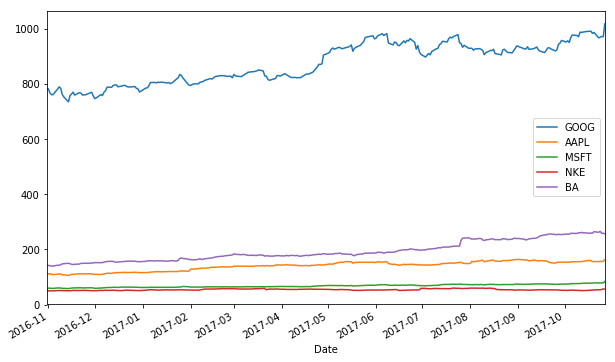

In [150]:
df.plot()

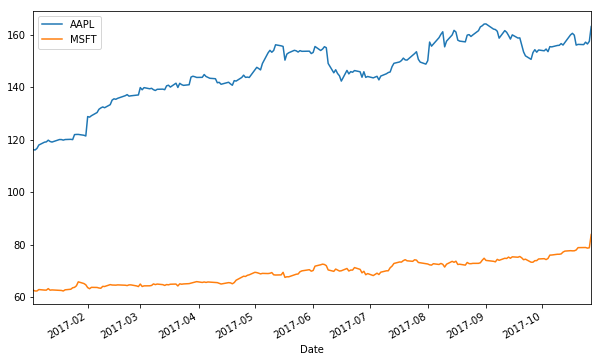

In [151]:
df['2017'][['AAPL','MSFT']].plot()

In [152]:
# show a correlation matrix (pearson)
crl = df.corr()
crl

,GOOG,AAPL,MSFT,NKE,BA
GOOG,1.000000,0.891214,0.930846,0.243598,0.814253
AAPL,0.891214,1.000000,0.895596,0.420657,0.842176
MSFT,0.930846,0.895596,1.000000,0.258769,0.945093
NKE,0.243598,0.420657,0.258769,1.000000,0.260557
BA,0.814253,0.842176,0.945093,0.260557,1.000000


In [ ]:
crl.sort_values(by='GOOG',ascending=False)